In [163]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# read image
barbara = cv2.imread('./barbara.png', cv2.IMREAD_GRAYSCALE)
pepper = cv2.imread('./pepper.png', cv2.IMREAD_GRAYSCALE)

# Exercise 1

In [165]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add salt noise
    salt_coords = [np.random.randint(0, high=image.shape[i], size=num_salt) for i in range(2)]
    salt_coords = np.array(salt_coords)
    noisy_image[salt_coords[0, :], salt_coords[1, :]] = 255

    # Add pepper noise
    pepper_coords = [np.random.randint(0, high=image.shape[i], size=num_pepper) for i in range(2)]
    pepper_coords = np.array(pepper_coords)
    noisy_image[pepper_coords[0, :], pepper_coords[1, :]] = 0

    return noisy_image

salt_and_pepper_noisy_barbara = add_salt_and_pepper_noise(barbara, salt_prob=0.01, pepper_prob=0.01)
salt_and_pepper_noisy_pepper = add_salt_and_pepper_noise(pepper, salt_prob=0.01, pepper_prob=0.01)


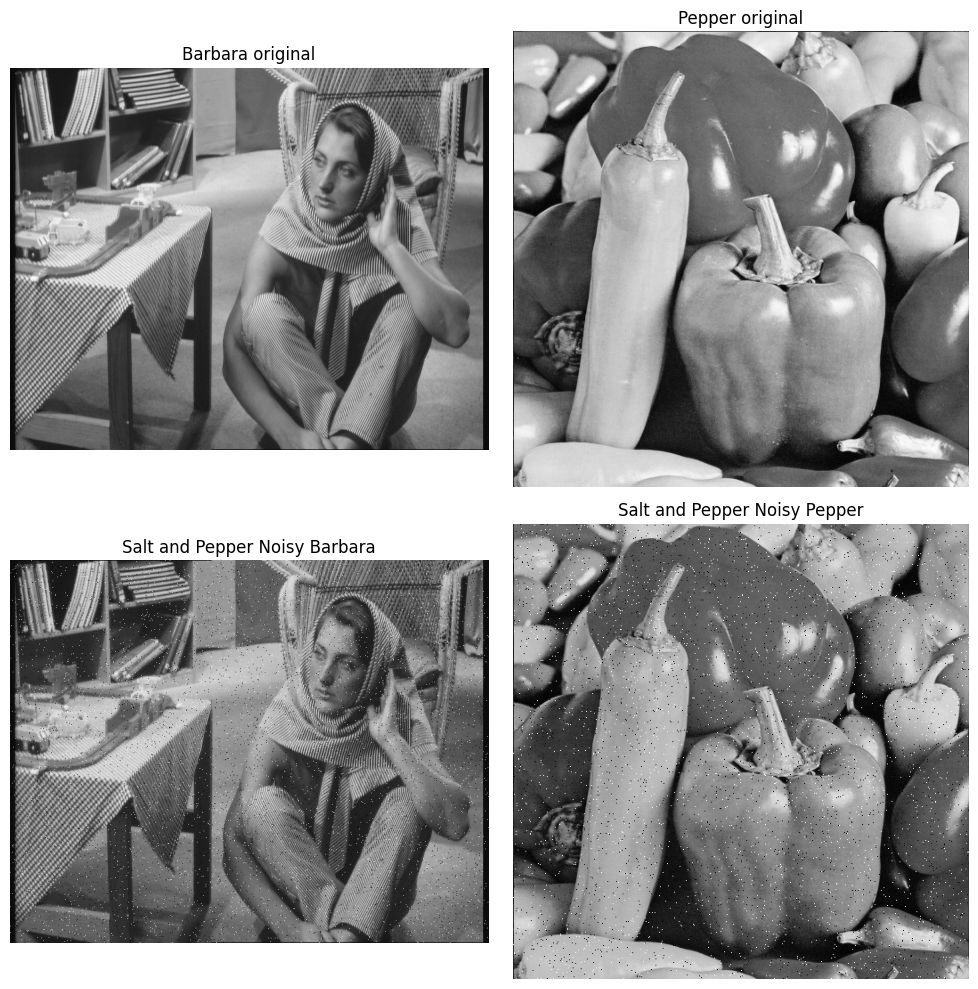

In [166]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(barbara, cmap='gray')
ax[0, 0].set_title('Barbara original')
ax[0, 0].axis('off')

ax[0, 1].imshow(pepper, cmap='gray')
ax[0, 1].set_title('Pepper original')
ax[0, 1].axis('off')

ax[1, 0].imshow(salt_and_pepper_noisy_barbara, cmap='gray')
ax[1, 0].set_title('Salt and Pepper Noisy Barbara')
ax[1, 0].axis('off')

ax[1, 1].imshow(salt_and_pepper_noisy_pepper, cmap='gray')
ax[1, 1].set_title('Salt and Pepper Noisy Pepper')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


# Exercises 2

In [167]:
np.ones((3, 3)) / (3**2)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [168]:
def linear_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    filter_image = np.zeros(image.shape, dtype=np.float32)
    
    height, width = image.shape
    
    for r in range(height):
        for c in range(width):
            location = padded_image[r:r + kernel_size, c:c + kernel_size]
            filter_image[r, c] = np.sum(location * kernel)
    return filter_image.astype(np.uint8)

# Khử nhiễu ảnh salt_and_pepper_noisy_barbara
filtered_barbara_3x3 = linear_filter(salt_and_pepper_noisy_barbara, 3)
filtered_barbara_7x7 = linear_filter(salt_and_pepper_noisy_barbara, 7)

# Khử nhiễu ảnh salt_and_pepper_noisy_pepper
filtered_pepper_3x3 = linear_filter(salt_and_pepper_noisy_pepper, 3)
filtered_pepper_7x7 = linear_filter(salt_and_pepper_noisy_pepper, 7)

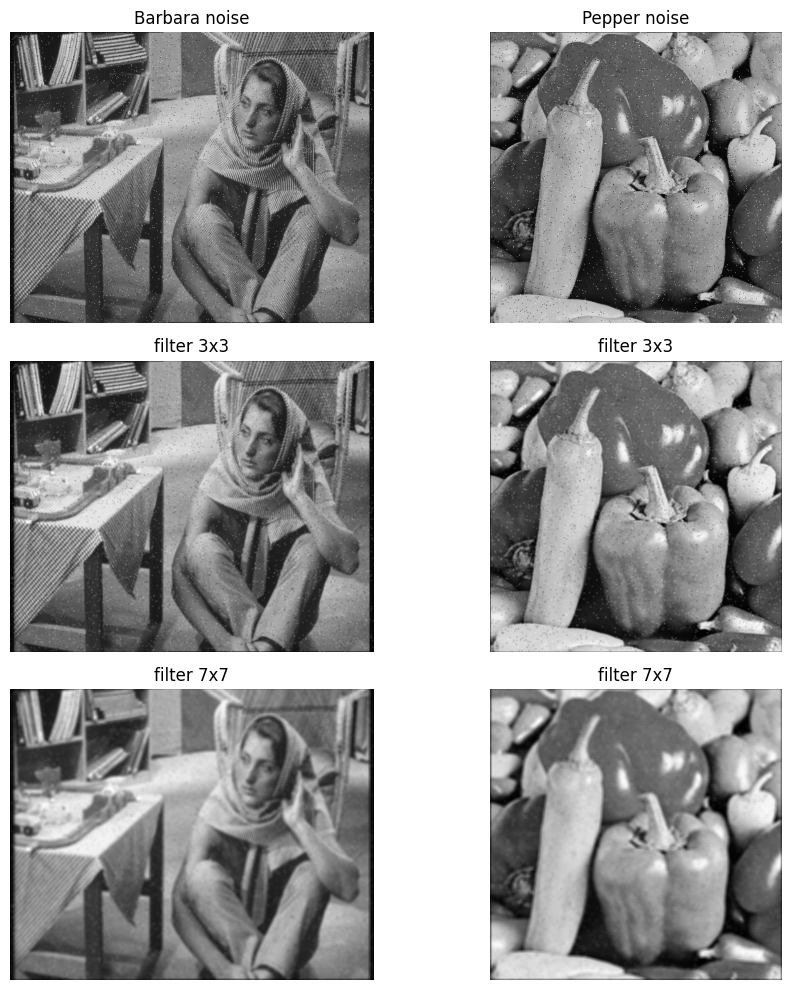

In [169]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax[0, 0].imshow(salt_and_pepper_noisy_barbara, cmap='gray')
ax[0, 0].set_title('Barbara noise')
ax[0, 0].axis('off')

ax[0, 1].imshow(salt_and_pepper_noisy_pepper, cmap='gray')
ax[0, 1].set_title('Pepper noise')
ax[0, 1].axis('off')

ax[1, 0].imshow(filtered_barbara_3x3, cmap='gray')
ax[1, 0].set_title('filter 3x3')
ax[1, 0].axis('off')

ax[1, 1].imshow(filtered_pepper_3x3, cmap='gray')
ax[1, 1].set_title('filter 3x3')
ax[1, 1].axis('off')

ax[2, 0].imshow(filtered_barbara_7x7, cmap='gray')
ax[2, 0].set_title('filter 7x7')
ax[2, 0].axis('off')

ax[2, 1].imshow(filtered_pepper_7x7, cmap='gray')
ax[2, 1].set_title('filter 7x7')
ax[2, 1].axis('off')

plt.tight_layout()
plt.show()


# Exercises 3

In [170]:
def median_filter(image, kernel_size):
    height, width = image.shape
    result = np.zeros_like(image)

    pad = kernel_size // 2

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            result[i, j] = np.median(region)

    return result

def weighted_median_filter(image, kernel_size):
    height, width = image.shape
    result = np.zeros_like(image)

    pad = kernel_size // 2

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            sorted_vals = np.sort(region.flatten())
            weighted_median = sorted_vals[kernel_size // 2]
            result[i, j] = weighted_median

    return result

def outlier_method(image, kernel_size, threshold):
    height, width = image.shape
    result = np.copy(image)

    pad = kernel_size // 2

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            max_val = np.max(region)
            min_val = np.min(region)

            if (image[i, j] > max_val or image[i, j] < min_val) and (max_val - min_val) > threshold:
                result[i, j] = (max_val + min_val) // 2

    return result

def outlier_method(image, kernel_size, threshold):
    height, width = image.shape
    result = np.copy(image)

    pad = kernel_size // 2

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            region = image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            max_val = np.max(region)
            min_val = np.min(region)

            if (image[i, j] > max_val or image[i, j] < min_val) and (max_val - min_val) > threshold:
                result[i, j] = (max_val + min_val) // 2

    return result

median_filtered_barbara = median_filter(barbara, kernel_size=3)
weighted_median_filtered_barbara = weighted_median_filter(barbara, kernel_size=3)
outlier_filtered_barbara = outlier_method(barbara, kernel_size=3, threshold=30)

median_filtered_pepper = median_filter(pepper, kernel_size=3)
weighted_median_filtered_pepper = weighted_median_filter(pepper, kernel_size=3)
outlier_filtered_pepper = outlier_method(pepper, kernel_size=3, threshold=30)


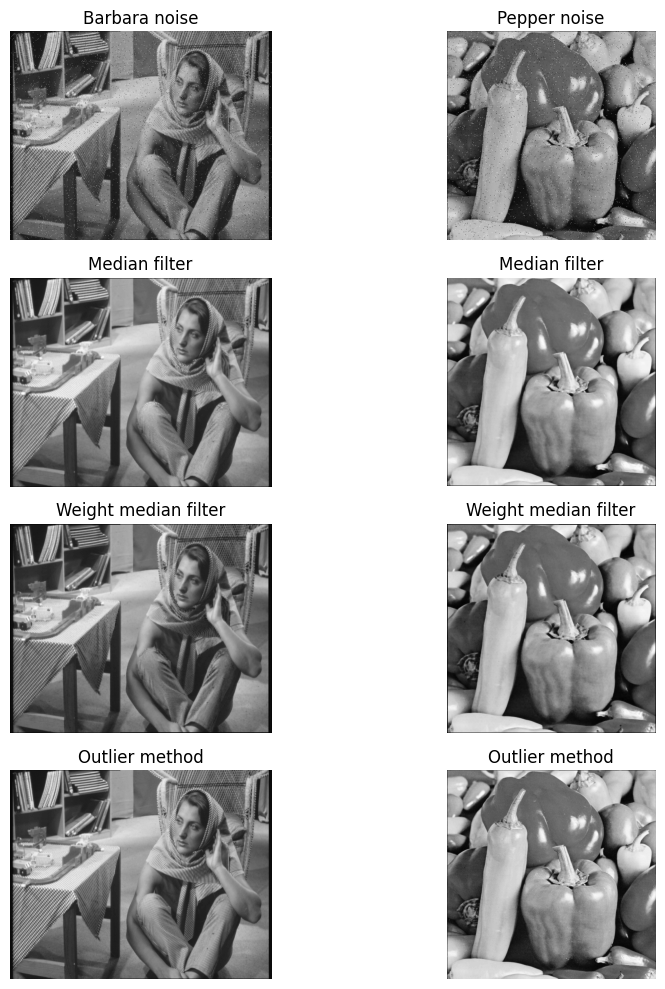

In [171]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

ax[0, 0].imshow(salt_and_pepper_noisy_barbara, cmap='gray')
ax[0, 0].set_title('Barbara noise')
ax[0, 0].axis('off')

ax[0, 1].imshow(salt_and_pepper_noisy_pepper, cmap='gray')
ax[0, 1].set_title('Pepper noise')
ax[0, 1].axis('off')

ax[1, 0].imshow(median_filtered_barbara, cmap='gray')
ax[1, 0].set_title('Median filter')
ax[1, 0].axis('off')

ax[1, 1].imshow(median_filtered_pepper, cmap='gray')
ax[1, 1].set_title('Median filter')
ax[1, 1].axis('off')

ax[2, 0].imshow(weighted_median_filtered_barbara, cmap='gray')
ax[2, 0].set_title('Weight median filter')
ax[2, 0].axis('off')

ax[2, 1].imshow(weighted_median_filtered_pepper, cmap='gray')
ax[2, 1].set_title('Weight median filter')
ax[2, 1].axis('off')

ax[3, 0].imshow(outlier_filtered_barbara, cmap='gray')
ax[3, 0].set_title('Outlier method')
ax[3, 0].axis('off')

ax[3, 1].imshow(outlier_filtered_pepper, cmap='gray')
ax[3, 1].set_title('Outlier method')
ax[3, 1].axis('off')

plt.tight_layout()
plt.show()


# Exercises 4

In [172]:
def psnr(original_image, denoise_image):
    mse = np.mean(denoise_image - original_image) ** 2
    return 10 * np.log10((255 * 255) / mse)

def ssim(original_image, denoise_image, window_size):
    output_ssim = np.zeros(denoise_image.shape)
    pad_size = int((window_size - 1) / 2)
    pad_img_denoise = np.pad(denoise_image, pad_width=pad_size, mode='reflect')
    pad_img_original = np.pad(original_image, pad_width=pad_size, mode='reflect')
    
    for i in range(pad_size, denoise_image.shape[0] - pad_size):
        for j in range(pad_size, denoise_image.shape[1] - pad_size):
            denoise_image_patch = pad_img_denoise[(i - pad_size):(i + pad_size + 1), (j - pad_size):j + pad_size + 1]
            original_image_patch = pad_img_original[(i - pad_size):(i + pad_size + 1), (j - pad_size):j + pad_size + 1]
            
            c1 = (0.01 * 255)**2
            c2 = (0.03 * 255)**2
            
            cov_xy = np.cov(denoise_image_patch.flat, original_image_patch.flat)
            mean_x = np.mean(denoise_image_patch)
            mean_y = np.mean(original_image_patch)
            
            numerator = (2 * mean_x * mean_y + c1) * (2 * cov_xy[0, 1] + c2)
            denominator = (mean_x ** 2 + mean_y ** 2 + c1) * (cov_xy[0, 0] + cov_xy[1, 1] + c2)
            
            output_ssim[i - pad_size, j - pad_size] = numerator / denominator
    return np.mean(output_ssim)